In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn

In [ ]:
#Reading & storing dataset
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


# Exploratory Data Analysis

In [ ]:
#Statistical analysis of the data
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [ ]:
#Information of the data at a glance
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [ ]:
#Checking for null values
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [ ]:
#The column 'umpire3' contains a considerable amount of NaN values.
#Since the off-field umpire parameter is inconsequential, we can eliminate this column.
data = data.drop(columns=['umpire3'], axis=1)

In [ ]:
#Printing first 5 rows of data
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [ ]:
#Filling null values
data['winner'].fillna('Draw', inplace=True)
data['city'].fillna('Dubai', inplace=True)

In [ ]:
#Since the amount of null values is just 3 for player of match, we can go ahead & drop those 3 records
#As this won't impact our dataset severly
data.dropna(subset=["player_of_match"], inplace=True)

In [ ]:
#Final check for null values
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
#Replacing Full names of the teams with their abbreviations
data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DD','SRH','RPS','RPS','KTK','PW'],inplace=True)

In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,RR,DD,RR,bat,normal,0,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,MI,RCB,MI,bat,normal,0,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,DC,KKR,DC,bat,normal,0,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [ ]:
#Unique observations that the variable city takes on
data.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [ ]:
#Dropping these 3 columns as they don't contribute for predictions
data.drop(columns=['dl_applied','id','date'],inplace=True)

In [ ]:
data.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2008,Bangalore,KKR,RCB,RCB,field,normal,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2008,Chandigarh,CSK,KXIP,CSK,bat,normal,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,2008,Delhi,RR,DD,RR,bat,normal,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,MI,RCB,MI,bat,normal,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,2008,Kolkata,DC,KKR,DC,bat,normal,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


# Visualisations

# Total number of matches played in each season

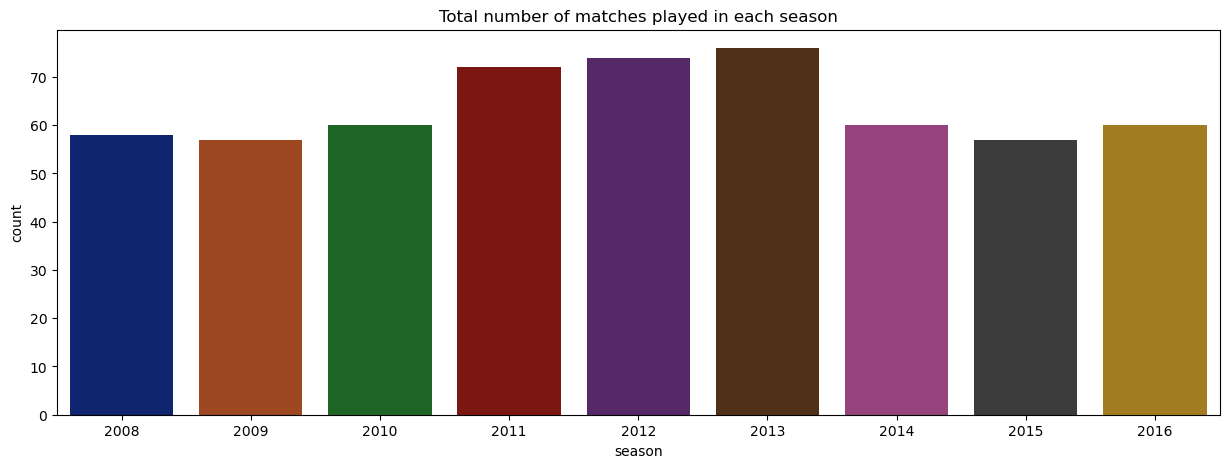

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x = 'season' , data = data, palette='dark')
plt.title('Total number of matches played in each season')
plt.show()

# Total number of matches won by each team

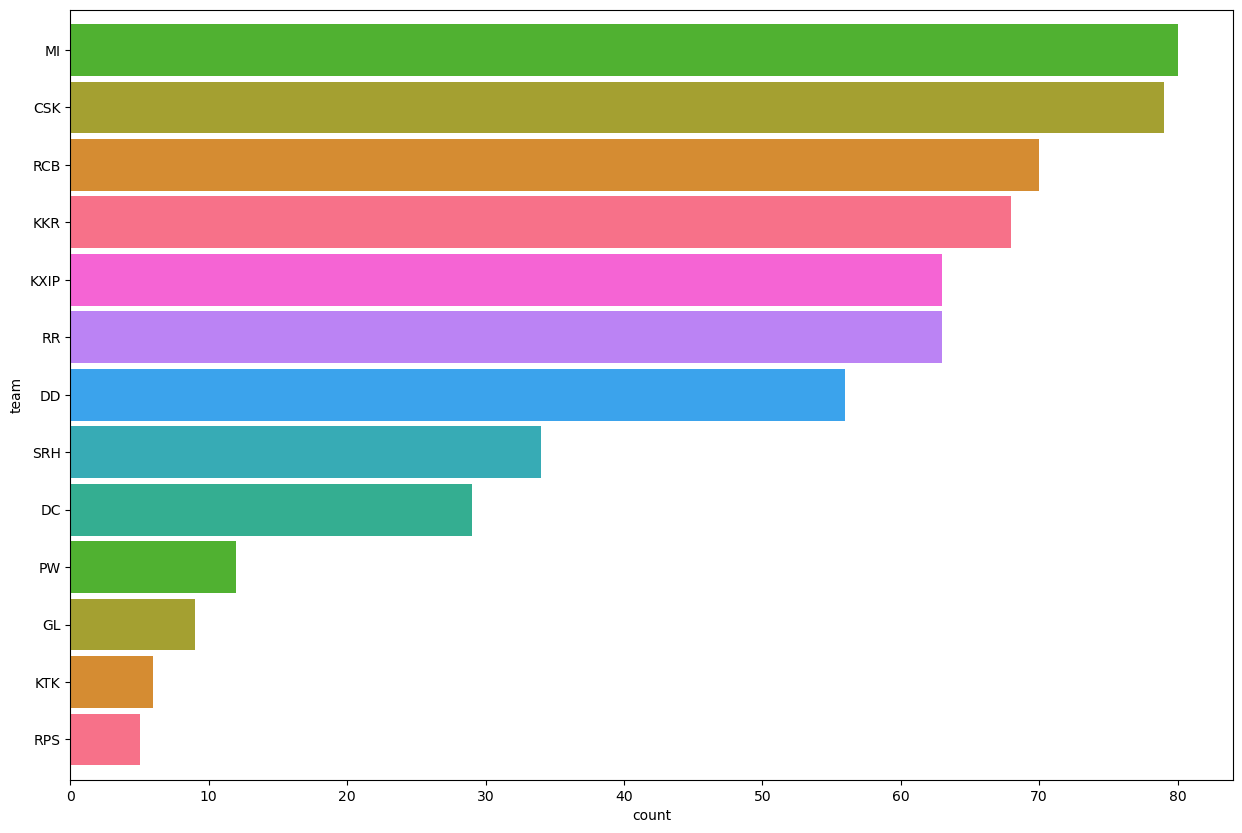

In [ ]:
plt.subplots(figsize=(15,10))
ax = data['winner'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

# Total number of matches won at each venue

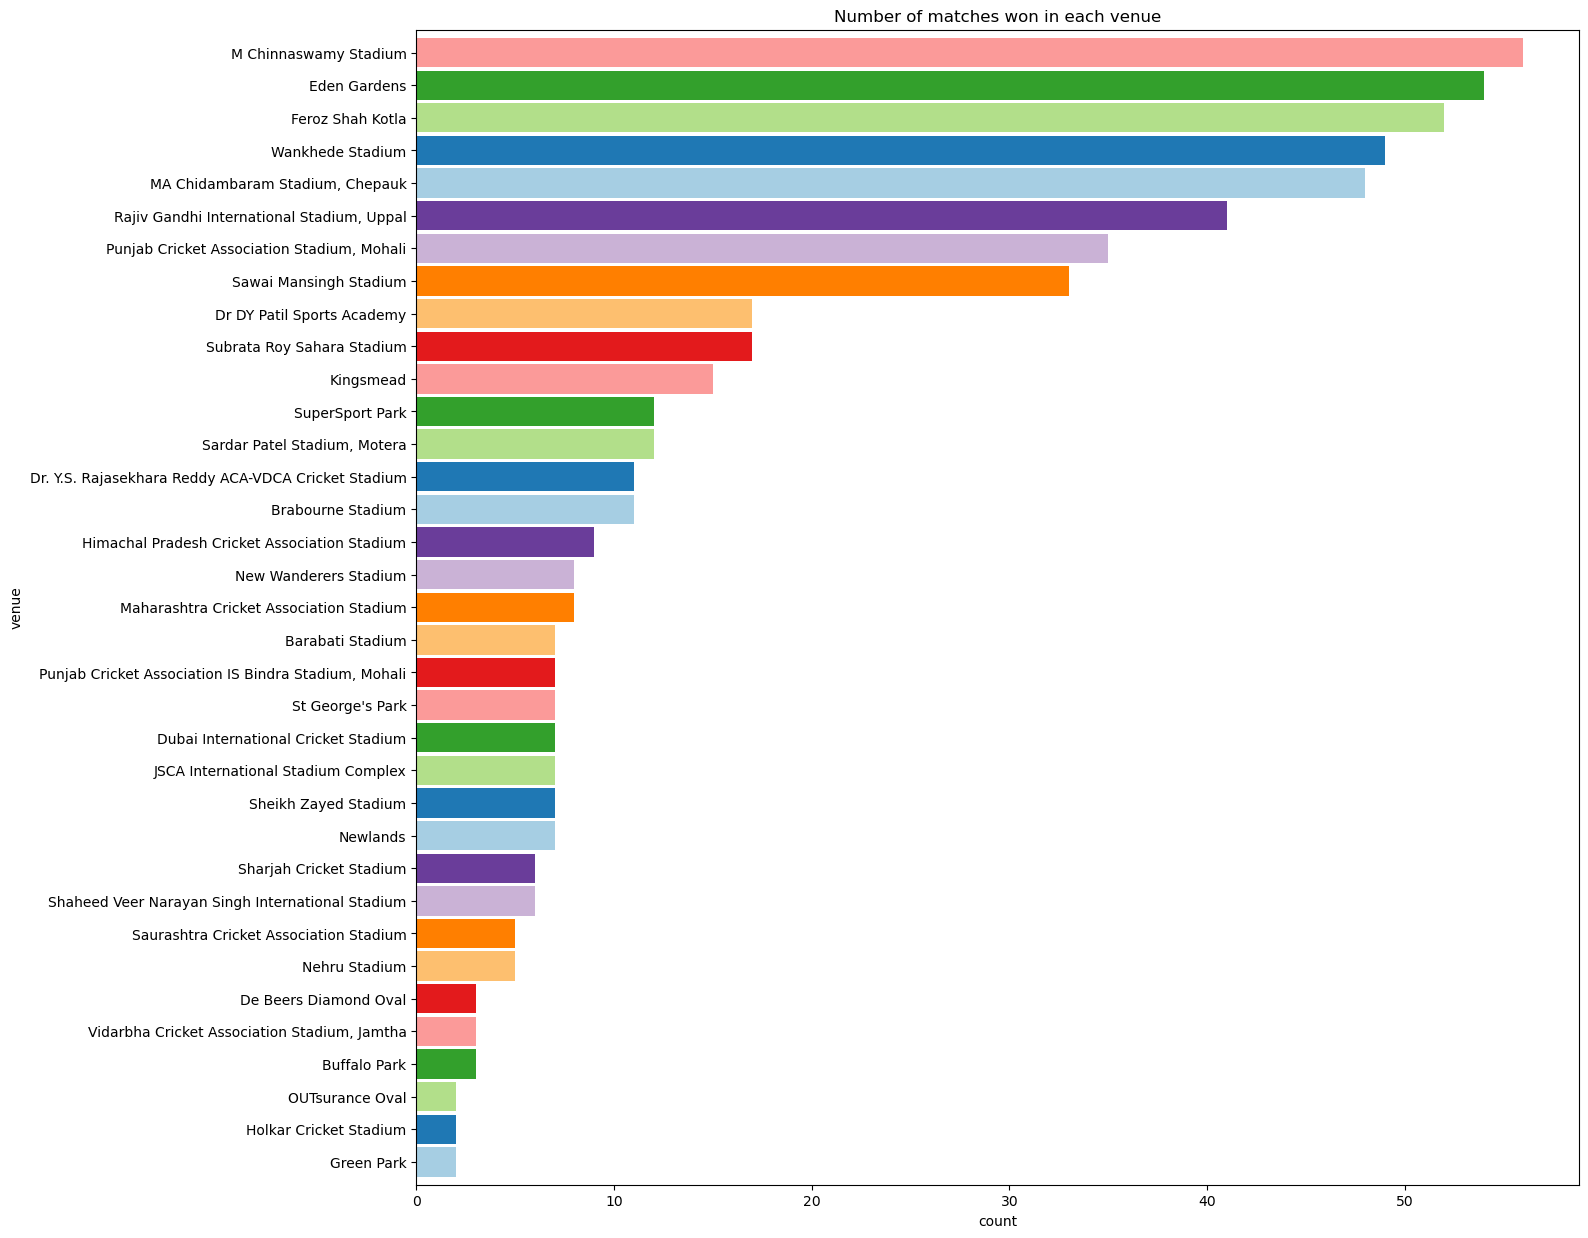

In [ ]:
plt.subplots(figsize=(15,15))
ax = data['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("Paired", 10))
ax.set_xlabel('count')
ax.set_ylabel('venue')
plt.title('Number of matches won in each venue')
plt.show()

# Chances of winning both toss and match

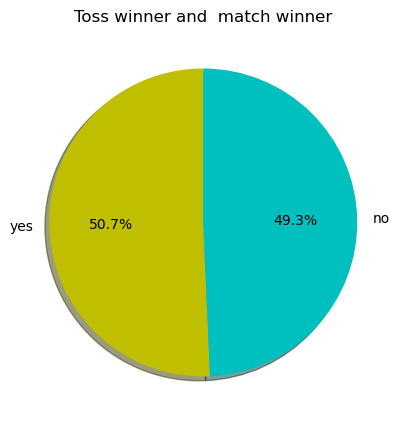

In [ ]:
df = data[data['toss_winner']==data['winner']]
ratio = [len(df), (len(data)-len(df))]
labels = ['yes', 'no']
plt.pie(ratio, labels=labels, colors=['y', 'c'], autopct='%1.1f%%', shadow=True, startangle=90)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Toss winner and  match winner")
plt.show()

# Team with most number of wins per season

In [ ]:
teams_per_season = data.groupby('season')['winner'].value_counts()
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2016    KKR        8
        DD         7
        MI         7
        RPS        5
        KXIP       4
Name: winner, Length: 76, dtype: int64

In [ ]:
#Checking for the shape of the data
data.shape

(574, 14)

# Label Encoding (categorical to numeric)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.winner)
data['team1']=le.transform(data.team1)
data['team2']=le.transform(data.team2)

In [ ]:
data['winner']=le.transform(data.winner)
data

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2008,Bangalore,4,9,RCB,field,normal,4,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2008,Chandigarh,0,6,CSK,bat,normal,0,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,2008,Delhi,11,2,RR,bat,normal,2,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,7,9,MI,bat,normal,9,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,2008,Kolkata,1,4,DC,bat,normal,4,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2016,Raipur,2,9,RCB,field,normal,9,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
573,2016,Bangalore,3,9,RCB,field,normal,9,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
574,2016,Delhi,12,4,KKR,field,normal,12,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
575,2016,Delhi,3,12,SRH,field,normal,12,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [ ]:
le2 = LabelEncoder()
data['city']=le2.fit_transform(data['city'])
data['player_of_match'] = le2.fit_transform(data['player_of_match'])
data['umpire1'] = le2.fit_transform(data['umpire1'])
data['umpire2'] = le2.fit_transform(data['umpire2'])
data['venue'] = le2.fit_transform(data['venue'])
data['toss_winner'] = le2.fit_transform(data['toss_winner'])
data['toss_decision'] = le2.fit_transform(data['toss_decision'])
data['result'] = le2.fit_transform(data['result'])

# Splitting data into train & test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('winner', axis=1)
y = data['winner']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(459, 13)

In [ ]:
X_test.shape

(115, 13)

# Artifical Neural Network (ANN)

In [ ]:
from keras import models,layers

In [ ]:
#Creating a sequential model with 2 Dense Hidden layers & 1 output softmax layer
network=models.Sequential()
network.add(layers.Dense(512,activation='leaky_relu',input_shape=(1*13,)))
network.add(layers.Dense(128,activation='leaky_relu',input_shape=(1*13,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
network.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
15/15 [==============================] - 2s 6ms/step - loss: -24657.7031 - accuracy: 0.0610
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: -95376.6094 - accuracy: 0.0545
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: -204711.0938 - accuracy: 0.0545
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: -356167.7188 - accuracy: 0.0545
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: -556912.4375 - accuracy: 0.0545
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: -812984.0625 - accuracy: 0.0545
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: -1121752.6250 - accuracy: 0.0545
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: -1492552.3750 - accuracy: 0.0545
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: -1935657.2500 - accuracy: 0.0545
Epoch 10/100
15/15 [==============================] - 

15/15 [==============================] - 0s 5ms/step - loss: -433233856.0000 - accuracy: 0.0545
Epoch 77/100
15/15 [==============================] - 0s 5ms/step - loss: -449564928.0000 - accuracy: 0.0545
Epoch 78/100
15/15 [==============================] - 0s 5ms/step - loss: -465973632.0000 - accuracy: 0.0545
Epoch 79/100
15/15 [==============================] - 0s 5ms/step - loss: -482534272.0000 - accuracy: 0.0545
Epoch 80/100
15/15 [==============================] - 0s 5ms/step - loss: -499965504.0000 - accuracy: 0.0545
Epoch 81/100
15/15 [==============================] - 0s 5ms/step - loss: -517664512.0000 - accuracy: 0.0545
Epoch 82/100
15/15 [==============================] - 0s 5ms/step - loss: -535746336.0000 - accuracy: 0.0545
Epoch 83/100
15/15 [==============================] - 0s 5ms/step - loss: -554350080.0000 - accuracy: 0.0545
Epoch 84/100
15/15 [==============================] - 0s 5ms/step - loss: -573119488.0000 - accuracy: 0.0545
Epoch 85/100
15/15 [============

# Correlation Matrix

<AxesSubplot:>

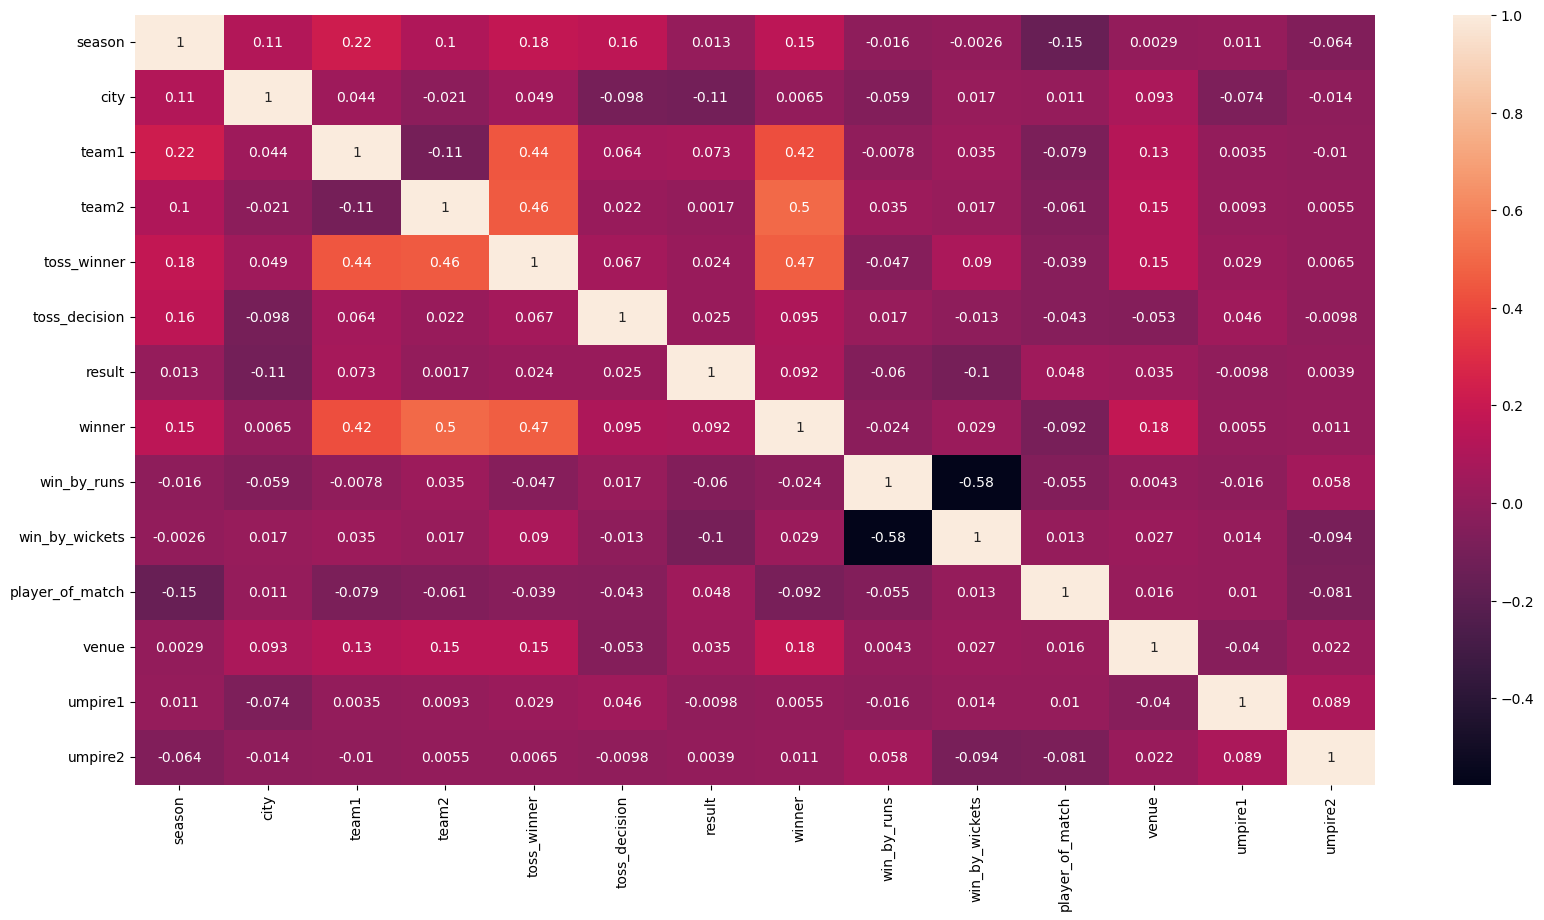

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(data,0.7)
len(set(corr_features))

0

# Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)*100))

[[7 0 0 0 4 0 2 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 1 0 0 0 0 1]
 [5 0 0 0 5 0 2 0 0 2 0 2 2]
 [0 0 0 0 0 0 0 2 0 0 0 0 2]
 [1 0 0 0 6 0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 0 1 0 0 0 0 2]
 [2 0 0 0 2 0 3 2 0 1 0 0 3]
 [3 0 0 0 2 0 0 5 0 0 0 2 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 1]
 [6 0 0 0 2 0 2 3 0 0 0 4 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 1 0 0 0 4 2]
 [0 0 0 0 0 0 0 0 0 0 0 1 3]]
              precision    recall  f1-score   support

           0       0.27      0.47      0.34        15
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         4
           4       0.25      0.67      0.36         9
           5       0.00      0.00      0.00         4
           6       0.30      0.23      0.26        13
           7       0.33      0.38      0.36        13
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        18
          10       0.00    

C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=9,min_samples_split=2,random_state=42)
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)*100))

[[15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 15  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  6  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  2  0 11  0  2  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  6  2]
 [ 0  0  0  0  0  0  0  1  0  0  0  1  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.57      1.00      0.73         4
           2       0.94      0.83      0.88        18
           3       0.00      0.00      0.00         4
           4       0.56      1.00      0.72         9
           5       0.00      0.00      0.00         4
           6       0.67      0.46      0.55        13
           7       0

C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=2, max_depth = 6)
RF.fit(X_train,y_train)
Y_P=RF.predict(X_test)
accuracy2=RF.score(X_test,y_test)
print(accuracy2)

0.7217391304347827


In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Hyper tuning of Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=RF,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=6),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.7015636918382914

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       n_estimators=200)

In [ ]:
classifier_rf = RandomForestClassifier(random_state= 80, n_jobs=-1, max_depth=30,min_samples_leaf=4,
                                       n_estimators=30, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=30,
                       n_jobs=-1, oob_score=True, random_state=80)

In [ ]:
classifier_rf.oob_score_

0.6623093681917211

In [ ]:
y_pred=classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7043478260869566

# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)*100))

[[ 0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        13
           7       0

C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREEJA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)


0.9304347826086956

In [ ]:
xbg = XGBClassifier(n_estimators = 100,colsample_bytree=0.3,learning_rate=0.2,gamma=0.4,max_depth=7)
xbg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

# Testing & Predicting

In [ ]:
test2 = data[-115:]
test2.drop(columns= ['winner'],inplace=True)

C:\Users\SREEJA\AppData\Local\Temp\ipykernel_23488\506171136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.drop(columns= ['winner'],inplace=True)


In [ ]:
test2.head()

,season,city,team1,team2,toss_winner,toss_decision,result,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
460,2015,25,11,6,6,1,0,26,0,72,16,36,10
461,2015,7,0,12,0,0,0,45,0,24,15,31,43
462,2015,21,4,9,9,1,0,0,3,29,7,35,9
463,2015,9,2,11,11,1,0,0,3,39,8,36,10
464,2015,22,6,7,7,1,0,18,0,53,34,1,20


In [ ]:
preds = xbg.predict(test2)

In [ ]:
new_preds = le.inverse_transform(preds)

In [ ]:
winner=[]
for i in range(60):
    if list(test2.team1)[i] == preds[i]:
        winner.append(1)
    else:
        winner.append(2)

In [ ]:
winner

[1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2]